In [1]:
# Dependencies

import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import plotly
plotly.tools.set_credentials_file(username='mcyee90', api_key='tyKEvUOsCK4MehoEmOKr')
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
import math 


In [2]:
traffic = pd.read_csv("traffic.csv")
traffic = traffic[['Date', 'Visitors', 'Visits', 'Page Views']]
traffic = traffic.apply(lambda x: x.str.replace(',',''))
traffic['Date'] =  pd.to_datetime(traffic['Date'])
traffic[['Visitors', 'Visits', 'Page Views']] = traffic[['Visitors', 'Visits', 'Page Views']].apply(pd.to_numeric)
traffic = traffic.groupby(['Date'])['Visitors', 'Visits', 'Page Views'].sum()
traffic = traffic.reset_index()
traffic.head()

,Date,Visitors,Visits,Page Views
0,2008-01-01,1100599,1430780,1650898
1,2008-01-02,1196844,1555899,1795268
2,2008-01-03,983286,1278272,1474928
3,2008-01-04,1221271,1587654,1831909
4,2008-01-05,1431153,1860499,2146730


In [3]:
market = pd.read_csv("market.csv")
market = market.apply(lambda x: x.str.replace(',',''))
market['Date'] =  pd.to_datetime(market['Date'])
market[['Visits to competitor sites', 'Social Media Mentions']] = market[['Visits to competitor sites', 'Social Media Mentions']].apply(pd.to_numeric)
market.head()

,Date,Visits to competitor sites,Social Media Mentions
0,2008-01-01,1216161,210225
1,2008-01-02,1322513,231825
2,2008-01-03,1086531,190125
3,2008-01-04,1349506,232925
4,2008-01-05,1581425,276055


In [4]:
sku = pd.read_csv("sku.csv")
sku = sku[['SKU', 'Product Name', 'Value', 'Beginning Inventory']]
sku[['Beginning Inventory']] = sku[['Beginning Inventory']].apply(lambda x: x.str.replace(',',''))
sku[['Value']] = sku[['Value']].apply(lambda x: x.str.replace('$',''))
sku[['Value', 'Beginning Inventory']] = sku[['Value', 'Beginning Inventory']].apply(pd.to_numeric)
sku = sku[0:10]
sku[['SKU', 'Value', 'Beginning Inventory']] = sku[['SKU', 'Value', 'Beginning Inventory']].astype(int)
sku['Price Tier'] = ""
for index, row in sku.iterrows():
    if row['Value'] < 35:
        sku.at[index, 'Price Tier'] = "L"
    elif row['Value'] < 100:
        sku.at[index, 'Price Tier'] = "M"
    else:
        sku.at[index, 'Price Tier'] = "H"
sku.head(200)

,SKU,Product Name,Value,Beginning Inventory,Price Tier
0,101,Pineappple Express 1G,50,2518,M
1,102,Fruit Punch - 100 MG,200,2676,H
2,103,Lip Balm - CBD,75,852,M
3,104,zen pen - 500mg,40,1168,M
4,105,Blue Diamond - 3G,30,1274,L
5,106,Nosh OG - 0.3G,30,124,L
6,107,Blue Dream PreRoll,25,410,L
7,108,Cannabis T-Shirt,50,1694,M
8,109,WiFi - 1G,75,552,M
9,110,Cookie Brownie Bar - 10MG,50,588,M


In [5]:
sales = pd.read_csv("sales.csv")
sales[['Transaction ID (Unique)']] = sales[['Transaction ID (Unique)']].apply(lambda x: x.str.replace(',',''))
sales['Date'] =  pd.to_datetime(sales['Date'])
sales[['Transaction ID (Unique)']] = sales[['Transaction ID (Unique)']].apply(pd.to_numeric)
sales.head()

,Date,Transaction ID (Unique),SKU
0,2008-01-01,1001,102
1,2008-01-01,1002,102
2,2008-01-01,1003,101
3,2008-01-01,1005,101
4,2008-01-01,1006,101


In [6]:
sales_data = pd.merge(sales, sku, on="SKU", how="left")
sales_data = sales_data[['Date', 'Transaction ID (Unique)', 'SKU', 'Product Name', 'Value']]
sales_data = sales_data.groupby('Date')['Value'].agg(['sum', 'count'])
sales_data = sales_data.reset_index()
sales_data.columns = ['Date', 'Revenue', 'Sales']
sales_data.head()

,Date,Revenue,Sales
0,2008-01-01,1000,10
1,2008-01-02,875,11
2,2008-01-03,800,9
3,2008-01-04,800,11
4,2008-01-05,1800,13


In [7]:
spend = pd.read_csv("media_spend.csv")
spend = spend.apply(lambda x: x.str.replace(',',''))
spend = spend.apply(lambda x: x.str.replace('$',''))
spend[['GRP (OOH)', 'PPC Spend', 'Display Spend', 'email Spend']] = spend[['GRP (OOH)', 'PPC Spend', 'Display Spend', 'email Spend']].apply(lambda x: x.str.replace(' ',''))
spend[['GRP (OOH)', 'PPC Spend', 'Display Spend', 'email Spend']] = spend[['GRP (OOH)', 'PPC Spend', 'Display Spend', 'email Spend']].apply(lambda x: x.str.replace('-',''))
spend['Date'] =  pd.to_datetime(spend['Date'])
spend[['GRP (OOH)', 'PPC Spend', 'Display Spend', 'email Spend']] = spend[['GRP (OOH)', 'PPC Spend', 'Display Spend', 'email Spend']].apply(pd.to_numeric)
spend[['GRP (OOH)', 'PPC Spend', 'Display Spend', 'email Spend']] = spend[['GRP (OOH)', 'PPC Spend', 'Display Spend', 'email Spend']].fillna(0)
spend[['GRP (OOH)', 'PPC Spend', 'Display Spend', 'email Spend']] = spend[['GRP (OOH)', 'PPC Spend', 'Display Spend', 'email Spend']].replace(np.nan, 0)
spend['total'] = ""
for index, row in spend.iterrows():
    spend.at[index, 'total'] = row['GRP (OOH)'] + row['PPC Spend'] + row['Display Spend'] + row['email Spend']
    
spend

,Date,GRP (OOH),PPC Spend,Display Spend,email Spend,total
0,2008-01-01,118500.000,1890.000,1491,1275.000,123156.000
1,2008-01-02,82500.000,2273.000,1272,720.000,86765.000
2,2008-01-03,159000.000,1710.000,1426,660.000,162796.000
3,2008-01-04,153000.000,1980.000,1410,750.000,157140.000
4,2008-01-05,123000.000,2160.000,1166,555.000,126881.000
5,2008-01-06,138000.000,1733.000,1085,713.000,141531.000
6,2008-01-07,124500.000,1935.000,1283,660.000,128378.000
7,2008-01-08,148500.000,3825.000,1219,728.000,154272.000
8,2008-01-09,135000.000,2160.000,1268,773.000,139201.000
9,2008-01-10,133500.000,1980.000,1321,480.000,137281.000


In [80]:
cost_revs = pd.merge(sales_data, spend, on="Date", how="left")
all_data = pd.merge(cost_revs, traffic, on="Date", how="left")
all_data.to_csv('all_data.csv')

In [9]:
trace1 = go.Scatter(
            x = all_data['Date'],
            y = all_data['Revenue'],
            name = "Revenues",
            line = {'color': "#008000"},
            mode = 'lines')

trace2 = go.Scatter(
            x = all_data['Date'],
            y = all_data['total'],
            name = "Cost",
            line = {'color': "#ff0000"},
            mode = 'lines',
            yaxis='y2')

trace3 = go.Scatter(
            x=all_data['Date'],
            y=all_data['Visits'],
            name = "Visits",
            line = {'color': "#0000ff"},
            mode = 'lines',
            yaxis='y3')

day_data = [trace1, trace2, trace3]

layout = go.Layout(
    title='Revenue, Cost and Website Visits (Daily)',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        domain=[0.25, 0.75],
        rangeslider=dict(
            visible = True
        ),
        type='date'
    ),
    yaxis = dict(
        title='Revenue',
        titlefont=dict(
            color='#008000'
            ),
        tickfont=dict(
            color='#008000'
            ),
        anchor='x',
        overlaying='y',
        side='left',
        position=0
        ),
    yaxis2 = dict(
        title='Cost',
        titlefont=dict(
            color='#ff0000'
            ),
        tickfont=dict(
            color='#ff0000'
            ),
        anchor='x',
        overlaying='y',
        side='right',
        ),
    
    yaxis3=dict(
        title='Visits',
        titlefont=dict(
            color='#0000ff'
            ),
        tickfont=dict(
            color='#0000ff'
            ),
        anchor='free',
        overlaying='y',
        side='right',
        position=.95
        )
)

fig1 = go.Figure(data=day_data, layout=layout)

py.iplot(fig1)


In [10]:
grouped_data = all_data
grouped_data['Month'] = ""
grouped_data['Week'] = ""
for d, row in grouped_data.iterrows():
    year = str(row['Date'])[0:4]
    month = str(row['Date'])[5:7]
    week = math.floor((int(d)/7)+1)
    grouped_data.at[d, "Week"] = week
    grouped_data.at[d, "Month"] = year + "-" + month
grouped_data['Month'] = pd.to_datetime(grouped_data['Month'])
    
grouped_data

,Date,Revenue,Sales,GRP (OOH),PPC Spend,Display Spend,email Spend,total,Visitors,Visits,Page Views,Month,Week
0,2008-01-01,1000,10,118500.000,1890.000,1491,1275.000,123156.000,1100599,1430780,1650898,2008-01-01,1
1,2008-01-02,875,11,82500.000,2273.000,1272,720.000,86765.000,1196844,1555899,1795268,2008-01-01,1
2,2008-01-03,800,9,159000.000,1710.000,1426,660.000,162796.000,983286,1278272,1474928,2008-01-01,1
3,2008-01-04,800,11,153000.000,1980.000,1410,750.000,157140.000,1221271,1587654,1831909,2008-01-01,1
4,2008-01-05,1800,13,123000.000,2160.000,1166,555.000,126881.000,1431153,1860499,2146730,2008-01-01,1
5,2008-01-06,1275,11,138000.000,1733.000,1085,713.000,141531.000,1200314,1560409,1800473,2008-01-01,1
6,2008-01-07,1050,12,124500.000,1935.000,1283,660.000,128378.000,1311519,1704975,1967279,2008-01-01,1
7,2008-01-08,2550,20,148500.000,3825.000,1219,728.000,154272.000,2172624,2824404,3258932,2008-01-01,2
8,2008-01-09,1700,12,135000.000,2160.000,1268,773.000,139201.000,1310882,1704148,1966323,2008-01-01,2
9,2008-01-10,900,12,133500.000,1980.000,1321,480.000,137281.000,1325506,1723158,1988260,2008-01-01,2


In [11]:
grouped_data.columns

Index(['Date', 'Revenue', 'Sales', 'GRP (OOH)', 'PPC Spend', 'Display Spend',
       'email Spend', 'total', 'Visitors', 'Visits', 'Page Views', 'Month',
       'Week'],
      dtype='object')

In [12]:
month_grouped = grouped_data.groupby(['Month'])['Revenue', 'Sales', 'GRP (OOH)', 'PPC Spend', 'Display Spend',
       'email Spend', 'total', 'Visitors', 'Visits', 'Page Views'].sum()
month_grouped['total'] = ""
for index, row in month_grouped.iterrows():
    month_grouped.at[index, 'total'] = row['GRP (OOH)'] + row['PPC Spend'] + row['Display Spend'] + row['email Spend']
month_grouped = month_grouped.reset_index()
month_grouped

,Month,Revenue,Sales,GRP (OOH),PPC Spend,Display Spend,email Spend,Visitors,Visits,Page Views,total
0,2008-01-01,41025,367,3958500.000,64334.000,39241,21382.000,40134319,52174598,60201465,4083457.000
1,2008-02-01,36400,330,3954000.000,56527.000,35795,18441.000,35994492,46792838,53991752,4064763.000
2,2008-03-01,37325,349,1536500.000,62175.000,38656,17652.000,37134444,48274776,55701681,1654983.000
3,2008-04-01,18860,333,1557250.000,22009.000,37743,8262.000,34946558,45430536,52419846,1625264.000
4,2008-05-01,21410,335,1622750.000,24406.000,39188,7886.000,34470589,44811769,51705887,1694230.000
5,2008-06-01,19925,331,246250.000,24182.000,37621,6665.000,34031829,44241375,51047740,314718.000
6,2008-07-01,20200,338,253500.000,3861.000,39297,1340.000,34748709,45173317,52123063,297998.000
7,2008-08-01,19400,336,349500.000,3809.000,39178,1244.000,34400622,44720824,51600938,393731.000
8,2008-09-01,18350,322,2832500.000,3648.000,37452,4454.000,33163253,43112226,49744880,2878054.000
9,2008-10-01,27890,349,2791500.000,44091.000,38484,14343.000,37446025,48679838,56169028,2888418.000


In [13]:
week_grouped = grouped_data.groupby(['Week'])['Revenue', 'Sales', 'GRP (OOH)', 'PPC Spend', 'Display Spend',
       'email Spend', 'total', 'Visitors', 'Visits', 'Page Views'].sum()
week_grouped['total'] = ""
for index, row in week_grouped.iterrows():
    week_grouped.at[index, 'total'] = row['GRP (OOH)'] + row['PPC Spend'] + row['Display Spend'] + row['email Spend']
week_grouped = week_grouped.reset_index()
week_grouped

,Week,Revenue,Sales,GRP (OOH),PPC Spend,Display Spend,email Spend,Visitors,Visits,Page Views,total
0,1,7600,77,898500.000,13681.000,9133,5333.000,8444986,10978488,12667485,926647.000
1,2,10525,89,957000.000,15998.000,9271,4765.000,9743912,12667074,14615858,987034.000
2,3,8625,83,865500.000,14290.000,7910,4689.000,9088268,11814743,13632401,892389.000
3,4,8975,79,937500.000,14064.000,8888,4667.000,8620549,11206716,12930822,965119.000
4,5,10650,83,771000.000,13997.000,8318,4629.000,9031102,11740427,13546650,797944.000
5,6,10075,84,925500.000,13884.000,8738,4396.000,9147243,11891417,13720873,952518.000
6,7,7650,75,967500.000,13186.000,9033,4607.000,8177416,10630638,12266124,994326.000
7,8,8150,80,967500.000,13817.000,8851,4022.000,8730410,11349529,13095615,994190.000
8,9,7600,72,707000.000,12062.000,8772,4553.000,7831212,10180577,11746821,732387.000
9,10,8025,77,248750.000,13658.000,8710,4788.000,8172480,10624229,12258730,275906.000


In [14]:
month_rev = go.Scatter(
            x = month_grouped['Month'],
            y = month_grouped['Revenue'],
            name = "Revenues",
            line = {'color': "#008000"},
            mode = 'lines',
            yaxis="y1")

month_cost = go.Scatter(
            x=month_grouped['Month'],
            y=month_grouped['total'],
            name = "cost",
            line = {'color': "#ff0000"},
            mode = 'lines',
            yaxis='y2')

month_visits = go.Scatter(
            x=month_grouped['Month'],
            y=month_grouped['Visits'],
            name = "Visits",
            line = {'color': "#0000ff"},
            mode = 'lines',
            yaxis='y3')

data = [month_rev, month_cost, month_visits]

layout = go.Layout(
    title='Revenue and Cost',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        domain=[0.2, 0.8],
        rangeslider=dict(
            visible = True
        ),
        type='date'
    ),
    yaxis1=dict(
        title='Revenue',
        titlefont=dict(
            color='#008000'
            ),
        tickfont=dict(
            color='#008000'
            ),
        anchor='x',
        overlaying='y',
        side='left',
        position=0.05
        ),
    yaxis2=dict(
        title='Cost',
        titlefont=dict(
            color='#ff0000'
            ),
        tickfont=dict(
            color='#ff0000'
            ),
        anchor='free',
        overlaying='y',
        side='left',
        position=.1
        ),
    yaxis3=dict(
        title='Visits',
        titlefont=dict(
            color='#0000ff'
            ),
        tickfont=dict(
            color='#0000ff'
            ),
        anchor='x',
        overlaying='y',
        side='right',
        position=.9
        ),
)

fig = go.Figure(data=data, layout=layout)

py.plot(fig)


'https://plot.ly/~mcyee90/289'

In [15]:
# wk_trace_rev = go.Scatter(
#             x = week_grouped['Week'],
#             y = week_grouped['Revenue'],
#             name = "revenues",
#             line = {'color': "#008000"},
#             yaxis="y1")

# wk_trace_cost = go.Scatter(
#             x=week_grouped['Week'],
#             y=week_grouped['total'],
#             name = "cost",
#             line = {'color': "#ff0000"},
#             yaxis='y2')

# data = [wk_trace_rev, wk_trace_cost]

# layout = go.Layout(
#     title='Revenue and Cost',
#     yaxis=dict(
#         title='Revenues'
#     ),
#     yaxis2=dict(
#         title='Cost',
#         overlaying='y',
#         side='right'
#     )
# )

# fig = go.Figure(data=data, layout=layout)

# py.plot(fig)

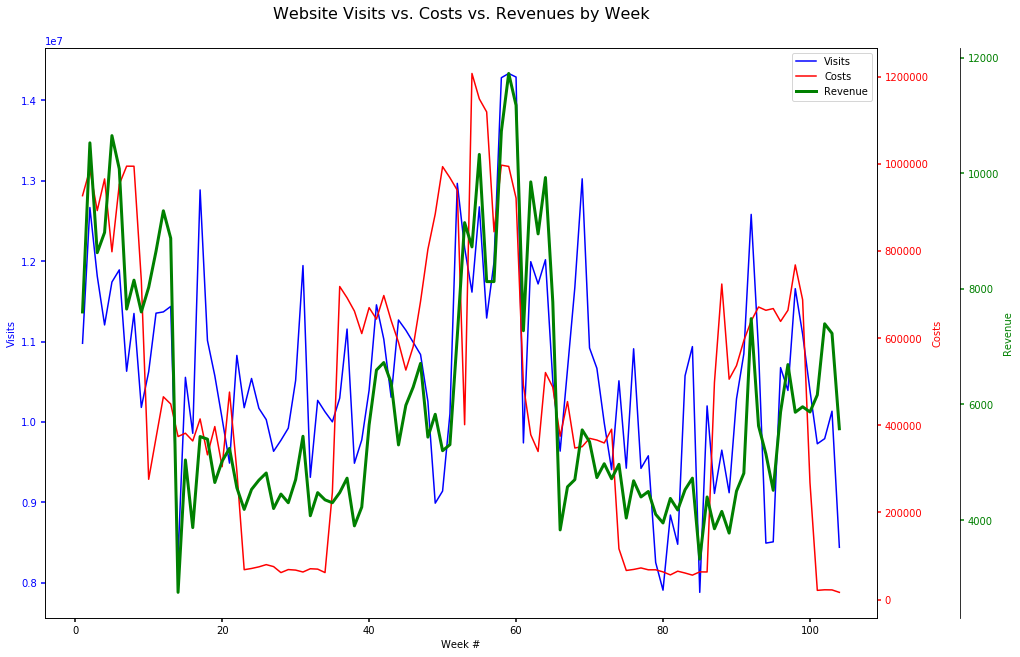

In [77]:
import matplotlib.pyplot as plt
import matplotlib


def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

par2.spines["right"].set_position(("axes", 1.1))
make_patch_spines_invisible(par2)
par2.spines["right"].set_visible(True)

p1, = host.plot(week_grouped['Week'], week_grouped['Visits'], "b-", label="Visits")
p2, = par1.plot(week_grouped['Week'], week_grouped['total'], "r-", label="Costs")
p3, = par2.plot(week_grouped['Week'], week_grouped['Revenue'], "g-", label="Revenue", linewidth=3.0)

plt.title("Website Visits vs. Costs vs. Revenues by Week", fontdict={'fontsize':16}, y=1.04)
host.set_xlabel("Week #")
host.set_ylabel("Visits")
par1.set_ylabel("Costs")
par2.set_ylabel("Revenue")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3]

host.legend(lines, [l.get_label() for l in lines])
fig.set_size_inches(18.5, 10.5, forward=True)
plt.show()

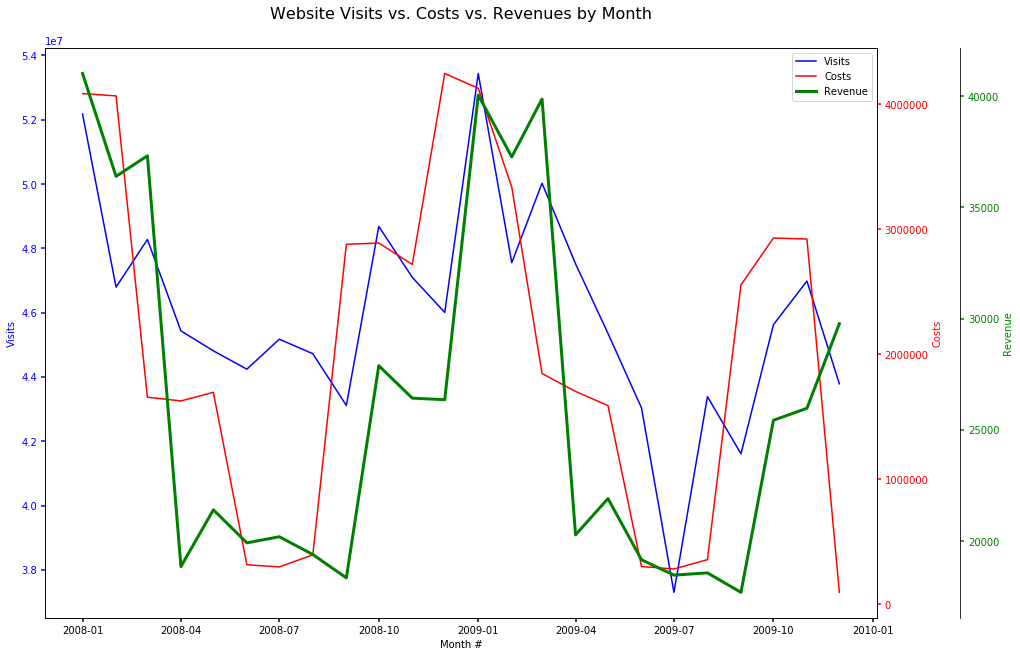

In [79]:
import matplotlib.pyplot as plt
import matplotlib


def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

par2.spines["right"].set_position(("axes", 1.1))
make_patch_spines_invisible(par2)
par2.spines["right"].set_visible(True)

p1, = host.plot(month_grouped['Month'], month_grouped['Visits'], "b-", label="Visits")
p2, = par1.plot(month_grouped['Month'], month_grouped['total'], "r-", label="Costs")
p3, = par2.plot(month_grouped['Month'], month_grouped['Revenue'], "g-", label="Revenue", linewidth=3.0)

plt.title("Website Visits vs. Costs vs. Revenues by Month", fontdict={'fontsize':16}, y=1.04)
host.set_xlabel("Month #")
host.set_ylabel("Visits")
par1.set_ylabel("Costs")
par2.set_ylabel("Revenue")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3]

host.legend(lines, [l.get_label() for l in lines])
fig.set_size_inches(18.5, 10.5, forward=True)
plt.show()

In [18]:
sku_sales = sales.groupby(['SKU']).count()
sku_sales = sku_sales.reset_index()
sku_sales = pd.merge(sku_sales, sku, on="SKU", how="left")
sku_sales['Percent Sold'] = ""
sku_sales['Revenue Total'] = ""
sku_sales['Market Share'] = ""
sku_sales.head(10)
for i, r in sku_sales.iterrows():
    sku_sales.at[i, 'Percent Sold'] = r['Transaction ID (Unique)']/r['Beginning Inventory']
    sku_sales.at[i, 'Revenue Total'] = r['Transaction ID (Unique)']*r['Value']
sku_sales = sku_sales.sort_values(by=['Value'])
total_sales = sku_sales['Revenue Total'].sum()
for i, r in sku_sales.iterrows():
    sku_sales.at[i, "Market Share"] = r['Revenue Total']/total_sales
sku_sales

,SKU,Date,Transaction ID (Unique),Product Name,Value,Beginning Inventory,Price Tier,Percent Sold,Revenue Total,Market Share
6,107,205,205,Blue Dream PreRoll,25,410,L,0.500,5125,0.008
4,105,637,637,Blue Diamond - 3G,30,1274,L,0.500,19110,0.030
5,106,186,186,Nosh OG - 0.3G,30,124,L,1.500,5580,0.009
3,104,584,584,zen pen - 500mg,40,1168,M,0.500,23360,0.037
0,101,1259,1259,Pineappple Express 1G,50,2518,M,0.500,62950,0.100
7,108,847,847,Cannabis T-Shirt,50,1694,M,0.500,42350,0.067
9,110,881,881,Cookie Brownie Bar - 10MG,50,588,M,1.498,44050,0.070
2,103,1278,1278,Lip Balm - CBD,75,852,M,1.500,95850,0.153
8,109,828,828,WiFi - 1G,75,552,M,1.500,62100,0.099
1,102,1338,1338,Fruit Punch - 100 MG,200,2676,H,0.500,267600,0.426


In [19]:
trace1 = go.Bar(
    x = sku_sales['Product Name'],
    y = sku_sales['Market Share'],
    name='Market Share',
    text= (100*sku_sales['Market Share']).map('{:,.1f}%'.format),
    textposition = 'outside',
    textfont=dict(
        color='#000000',
    ),
    marker=dict(
        color='#0000ff',
        line=dict(
            color='#0000ff',
            width=1),
        ),
    opacity=.5
)

trace2 = go.Bar(
    x = sku_sales['Product Name'],
    y = sku_sales['Percent Sold'],
    name='Percent of Inventory Sold',
    text= (100*sku_sales['Percent Sold']).map('{:,.1f}%'.format),
    textposition = 'outside',
    textfont=dict(
        color='#000000',
    ),
    marker=dict(
        color='#008000',
        line=dict(
            color='#008000',
            width=1),
        ),
    opacity=.5
    )

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title='Sales Analysis',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [33]:
sales_lmh = pd.merge(sales, sku, on="SKU", how="left")
sales_lmh = sales_lmh.groupby(['Date', 'Price Tier'])['Price Tier'].agg(['count'])
sales_lmh = sales_lmh.reset_index()
sales_lmh.head(5)

,Date,Price Tier,count
0,2008-01-01,H,3
1,2008-01-01,M,7
2,2008-01-02,H,2
3,2008-01-02,M,9
4,2008-01-03,H,2


In [48]:
sales_l = sales_lmh[sales_lmh['Price Tier']=="L"]
sales_l = pd.merge(grouped_data, sales_l, on='Date', how='left')
sales_l_week = sales_l.groupby(['Week'])['Revenue', 'Sales', 'GRP (OOH)', 'PPC Spend', 'Display Spend',
       'email Spend', 'total', 'Visitors', 'Visits', 'Page Views','count'].sum()
sales_l_week['count'] = sales_l_week['count'].fillna(0)
sales_l_week['count'] = sales_l_week['count'].replace(np.nan, 0)
sales_l_week = sales_l_week.reset_index()
sales_l_week

,Week,Revenue,Sales,GRP (OOH),PPC Spend,Display Spend,email Spend,Visitors,Visits,Page Views,count
0,1,7600,77,898500.000,13681.000,9133,5333.000,8444986,10978488,12667485,0.000
1,2,10525,89,957000.000,15998.000,9271,4765.000,9743912,12667074,14615858,0.000
2,3,8625,83,865500.000,14290.000,7910,4689.000,9088268,11814743,13632401,0.000
3,4,8975,79,937500.000,14064.000,8888,4667.000,8620549,11206716,12930822,0.000
4,5,10650,83,771000.000,13997.000,8318,4629.000,9031102,11740427,13546650,0.000
5,6,10075,84,925500.000,13884.000,8738,4396.000,9147243,11891417,13720873,0.000
6,7,7650,75,967500.000,13186.000,9033,4607.000,8177416,10630638,12266124,0.000
7,8,8150,80,967500.000,13817.000,8851,4022.000,8730410,11349529,13095615,0.000
8,9,7600,72,707000.000,12062.000,8772,4553.000,7831212,10180577,11746821,0.000
9,10,8025,77,248750.000,13658.000,8710,4788.000,8172480,10624229,12258730,0.000


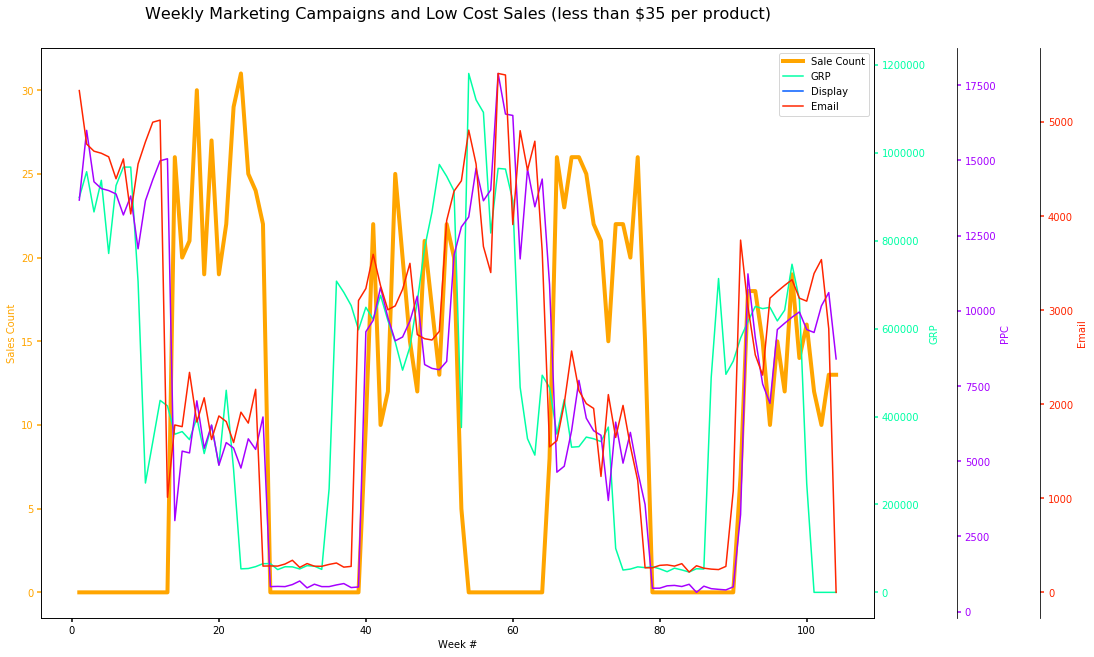

In [68]:
sales_l = sales_lmh[sales_lmh['Price Tier']=="L"]
sales_l = pd.merge(grouped_data, sales_l, on='Date', how='left')
sales_l_week = sales_l.groupby(['Week'])['Revenue', 'Sales', 'GRP (OOH)', 'PPC Spend', 'Display Spend',
       'email Spend', 'total', 'Visitors', 'Visits', 'Page Views','count'].sum()
sales_l_week['count'] = sales_l_week['count'].fillna(0)
sales_l_week['count'] = sales_l_week['count'].replace(np.nan, 0)
sales_l_week = sales_l_week.reset_index()

def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)
tkw = dict(size=4, width=1.5)
host.set_xlabel("Week #")
host.set_ylabel("Sales Count")
p1, = host.plot(sales_l_week['Week'], sales_l_week['count'], color="#ffa500", label="Sale Count", linewidth=4)
host.yaxis.label.set_color(p1.get_color())
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

par1 = host.twinx()
p2, = par1.plot(sales_l_week['Week'], sales_l_week['GRP (OOH)'], color="#00ffa5", label="GRP")
par1.set_ylabel("GRP")
par1.yaxis.label.set_color(p2.get_color())
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)

par2 = host.twinx()
par2.spines["right"].set_position(("axes", 1.1))
make_patch_spines_invisible(par2)
par2.spines["right"].set_visible(True)
p3, = par2.plot(sales_l_week['Week'], sales_l_week['PPC Spend'], color="#a500ff", label="PPC")
par2.set_ylabel("PPC")
par2.yaxis.label.set_color(p3.get_color())
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)

# par3 = host.twinx()
# par3.spines["right"].set_position(("axes", 1.2))
# make_patch_spines_invisible(par3)
# par3.spines["right"].set_visible(True)
# p4, = par3.plot(sales_l_week['Week'], sales_l_week['Display Spend'], color="#005aff", label="Display")
# par3.set_ylabel("Display")
# par3.yaxis.label.set_color(p4.get_color())
# par3.tick_params(axis='y', colors=p4.get_color(), **tkw)

par4 = host.twinx()
par4.spines["right"].set_position(("axes", 1.2))
make_patch_spines_invisible(par4)
par4.spines["right"].set_visible(True)
p5, = par4.plot(sales_l_week['Week'], sales_l_week['email Spend'], color="#ff2500", label="Email")
par4.set_ylabel("Email")
par4.yaxis.label.set_color(p5.get_color())
par4.tick_params(axis='y', colors=p5.get_color(), **tkw)

plt.title("Weekly Marketing Campaigns and Low Cost Sales (less than $35 per product)", fontdict={'fontsize':16}, y=1.04)

lines = [
    p1, 
    p2,  
#     p3,  
    p4,    
    p5
        ]

host.legend(lines, [l.get_label() for l in lines])
fig.set_size_inches(18.5, 10.5, forward=True)
plt.show()

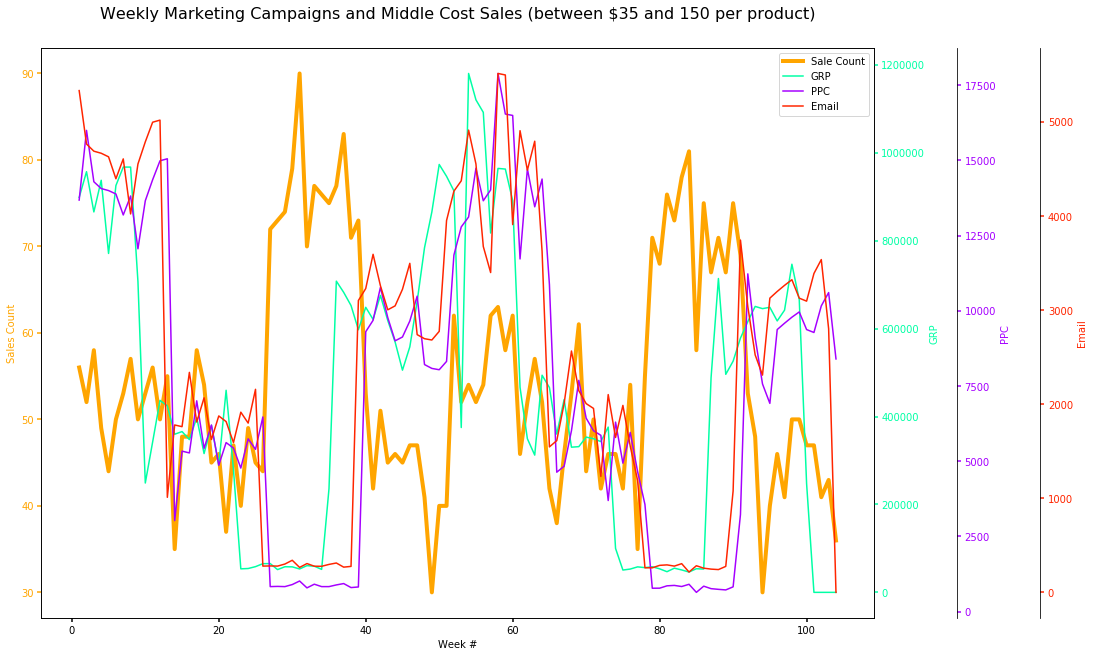

In [75]:
sales_m = sales_lmh[sales_lmh['Price Tier']=="M"]
sales_m = pd.merge(grouped_data, sales_m, on='Date', how='left')
sales_m_week = sales_m.groupby(['Week'])['Revenue', 'Sales', 'GRP (OOH)', 'PPC Spend', 'Display Spend',
       'email Spend', 'total', 'Visitors', 'Visits', 'Page Views','count'].sum()
sales_m_week['count'] = sales_m_week['count'].fillna(0)
sales_m_week['count'] = sales_m_week['count'].replace(np.nan, 0)
sales_m_week = sales_m_week.reset_index()

def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)
tkw = dict(size=4, width=1.5)
host.set_xlabel("Week #")
host.set_ylabel("Sales Count")
p1, = host.plot(sales_m_week['Week'], sales_m_week['count'], color="#ffa500", label="Sale Count", linewidth=4.0)
host.yaxis.label.set_color(p1.get_color())
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

par1 = host.twinx()
p2, = par1.plot(sales_m_week['Week'], sales_m_week['GRP (OOH)'], color="#00ffa5", label="GRP")
par1.set_ylabel("GRP")
par1.yaxis.label.set_color(p2.get_color())
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)

par2 = host.twinx()
par2.spines["right"].set_position(("axes", 1.1))
make_patch_spines_invisible(par2)
par2.spines["right"].set_visible(True)
p3, = par2.plot(sales_m_week['Week'], sales_m_week['PPC Spend'], color="#a500ff", label="PPC")
par2.set_ylabel("PPC")
par2.yaxis.label.set_color(p3.get_color())
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)

# par3 = host.twinx()
# par3.spines["right"].set_position(("axes", 1.2))
# make_patch_spines_invisible(par3)
# par3.spines["right"].set_visible(True)
# p4, = par3.plot(sales_m_week['Week'], sales_m_week['Display Spend'], color="#005aff", label="Display")
# par3.set_ylabel("Display")
# par3.yaxis.label.set_color(p4.get_color())
# par3.tick_params(axis='y', colors=p4.get_color(), **tkw)

par4 = host.twinx()
par4.spines["right"].set_position(("axes", 1.2))
make_patch_spines_invisible(par4)
par4.spines["right"].set_visible(True)
p5, = par4.plot(sales_m_week['Week'], sales_m_week['email Spend'], color="#ff2500", label="Email")
par4.set_ylabel("Email")
par4.yaxis.label.set_color(p5.get_color())
par4.tick_params(axis='y', colors=p5.get_color(), **tkw)

plt.title("Weekly Marketing Campaigns and Middle Cost Sales (between $35 and 150 per product)", fontdict={'fontsize':16}, y=1.04)

lines = [
    p1, 
    p2,  
    p3,  
#     p4,    
    p5
        ]

host.legend(lines, [l.get_label() for l in lines])
fig.set_size_inches(18.5, 10.5, forward=True)
plt.show()

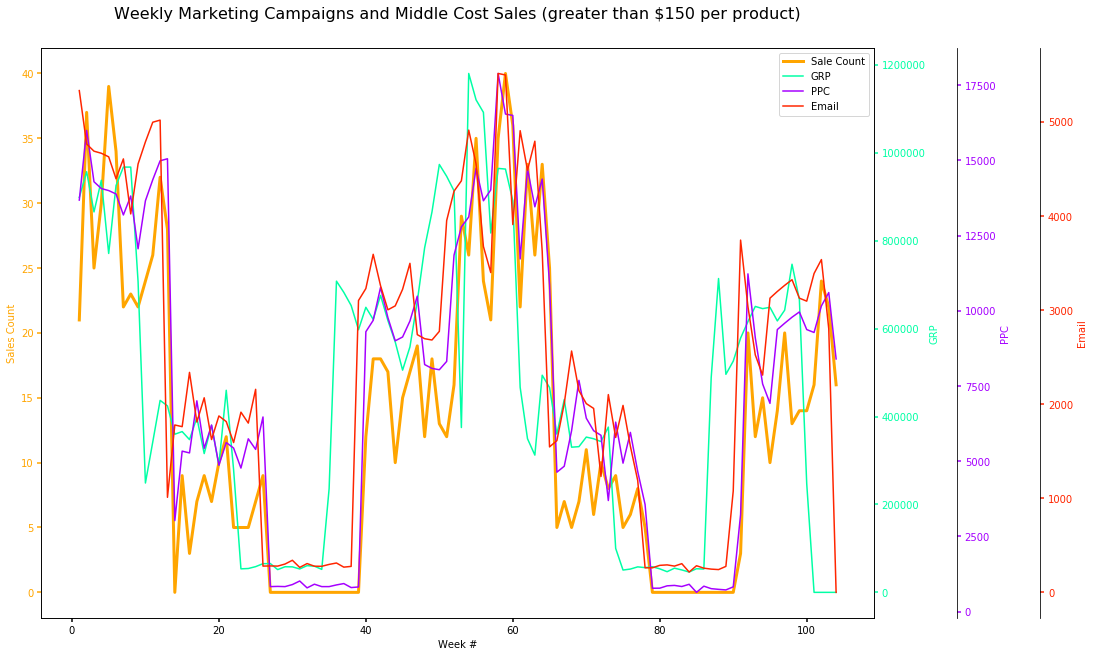

In [76]:
sales_h = sales_lmh[sales_lmh['Price Tier']=="H"]
sales_h = pd.merge(grouped_data, sales_h, on='Date', how='left')
sales_h_week = sales_h.groupby(['Week'])['Revenue', 'Sales', 'GRP (OOH)', 'PPC Spend', 'Display Spend',
       'email Spend', 'total', 'Visitors', 'Visits', 'Page Views','count'].sum()
sales_h_week['count'] = sales_h_week['count'].fillna(0)
sales_h_week['count'] = sales_h_week['count'].replace(np.nan, 0)
sales_h_week = sales_h_week.reset_index()

def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)
tkw = dict(size=4, width=1.5)
host.set_xlabel("Week #")
host.set_ylabel("Sales Count")
p1, = host.plot(sales_h_week['Week'], sales_h_week['count'], color="#ffa500", label="Sale Count", linewidth=3.0)
host.yaxis.label.set_color(p1.get_color())
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

par1 = host.twinx()
p2, = par1.plot(sales_h_week['Week'], sales_h_week['GRP (OOH)'], color="#00ffa5", label="GRP")
par1.set_ylabel("GRP")
par1.yaxis.label.set_color(p2.get_color())
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)

par2 = host.twinx()
par2.spines["right"].set_position(("axes", 1.1))
make_patch_spines_invisible(par2)
par2.spines["right"].set_visible(True)
p3, = par2.plot(sales_h_week['Week'], sales_h_week['PPC Spend'], color="#a500ff", label="PPC")
par2.set_ylabel("PPC")
par2.yaxis.label.set_color(p3.get_color())
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)

# par3 = host.twinx()
# par3.spines["right"].set_position(("axes", 1.2))
# make_patch_spines_invisible(par3)
# par3.spines["right"].set_visible(True)
# p4, = par3.plot(sales_h_week['Week'], sales_h_week['Display Spend'], color="#005aff", label="Display")
# par3.set_ylabel("Display")
# par3.yaxis.label.set_color(p4.get_color())
# par3.tick_params(axis='y', colors=p4.get_color(), **tkw)

par4 = host.twinx()
par4.spines["right"].set_position(("axes", 1.2))
make_patch_spines_invisible(par4)
par4.spines["right"].set_visible(True)
p5, = par4.plot(sales_h_week['Week'], sales_h_week['email Spend'], color="#ff2500", label="Email")
par4.set_ylabel("Email")
par4.yaxis.label.set_color(p5.get_color())
par4.tick_params(axis='y', colors=p5.get_color(), **tkw)

plt.title("Weekly Marketing Campaigns and Middle Cost Sales (greater than $150 per product)", fontdict={'fontsize':16}, y=1.04)

lines = [
    p1, 
    p2,  
    p3,  
#     p4,    
    p5
        ]

host.legend(lines, [l.get_label() for l in lines])
fig.set_size_inches(18.5, 10.5, forward=True)
plt.show()

In [38]:
sales_h = sales_lmh[sales_lmh['Price Tier']=="H"]
sales_h

,Date,Price Tier,count
0,2008-01-01,H,3
2,2008-01-02,H,2
4,2008-01-03,H,2
6,2008-01-04,H,1
8,2008-01-05,H,7
10,2008-01-06,H,4
12,2008-01-07,H,2
14,2008-01-08,H,10
16,2008-01-09,H,7
18,2008-01-10,H,1
